<a href="https://colab.research.google.com/github/cynicalsensei/M-A-Analytics-Project/blob/main/Nikhil_M%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("acquisitions_update_2021.csv")

In [ ]:
print(data)

        ID Parent Company Acquisition Year Acquisition Month  \
0        1          Apple             1988               Mar   
1        2          Apple             1988               Jun   
2        3          Apple             1988               Jun   
3        4          Apple             1988               Jul   
4        5          Apple             1989               Jan   
...    ...            ...              ...               ...   
1450  1451         Citrix             2015               Apr   
1451  1452         Citrix             2016               Sep   
1452  1453         Citrix             2017               Jan   
1453  1454         Citrix             2018               Feb   
1454  1455         Citrix             2021               Mar   

           Acquired Company                                      Business  \
0       Network Innovations                                      Software   
1     Orion Network Systems                             Computer Software   


In [ ]:
data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.8+ KB


# Cleaning Data

In [ ]:
data.replace('-',np.nan, inplace=True)
data

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,NaN,NaN,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,NaN,NaN,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,NaN,United States,NaN,NaN,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,NaN,NaN,Citrix ITM


In [ ]:
data['Acquisition Price'].value_counts()

undisclosed    127
100000000       17
50000000        13
200000000       11
30000000        10
              ... 
555000000        1
380000000        1
163000000        1
180000000        1
71300000000      1
Name: Acquisition Price, Length: 228, dtype: int64

There seems to be an 'undisclosed' value in the Acquisition Price col so we'll set that to NaN too

In [ ]:
data['Acquisition Price'].replace('undisclosed',np.nan, inplace=True)
data['Acquisition Price'].value_counts()

100000000      17
50000000       13
200000000      11
30000000       10
40000000        8
               ..
555000000       1
380000000       1
163000000       1
180000000       1
71300000000     1
Name: Acquisition Price, Length: 227, dtype: int64

In [ ]:
data['Country'].fillna('Others', inplace=True)

Converting Year and Price cols to float/int

In [ ]:
data['Acquisition Year'] = pd.to_numeric(data['Acquisition Year'], errors = 'coerce')
data['Acquisition Price'] = pd.to_numeric(data['Acquisition Price'], errors = 'coerce')

Since my analysis pertains only to Apple and Disney, I have dropped the columns that are not Apple or Disney in Parent Company 

Acquisition year seemed to have been interpreted as float by Python for some reason so I remove the decimal point

In [ ]:
data['Acquisition Year'] = data['Acquisition Year'].astype(str).apply(lambda x: x.replace('.0',''))

# Basic EDA


In [ ]:
data1 = data[data['Parent Company']=='Apple']
data2 = data[data['Parent Company']=='Disney']
data3 = data[data['Parent Company'].isin(['Apple','Disney'])]

**ACQUISITIONS OVER THE YEARS**

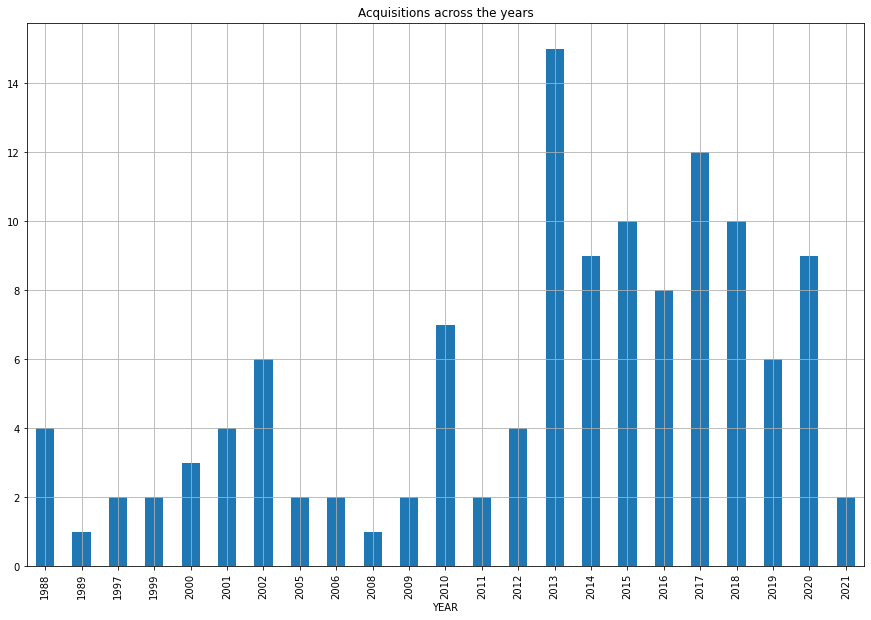

In [ ]:
plt.figure(figsize=(15,10))
data1['Acquisition Year'].value_counts(sort=False).plot.bar(grid=True)
plt.xlabel('YEAR')
plt.title("Acquisitions across the years")
plt.show()

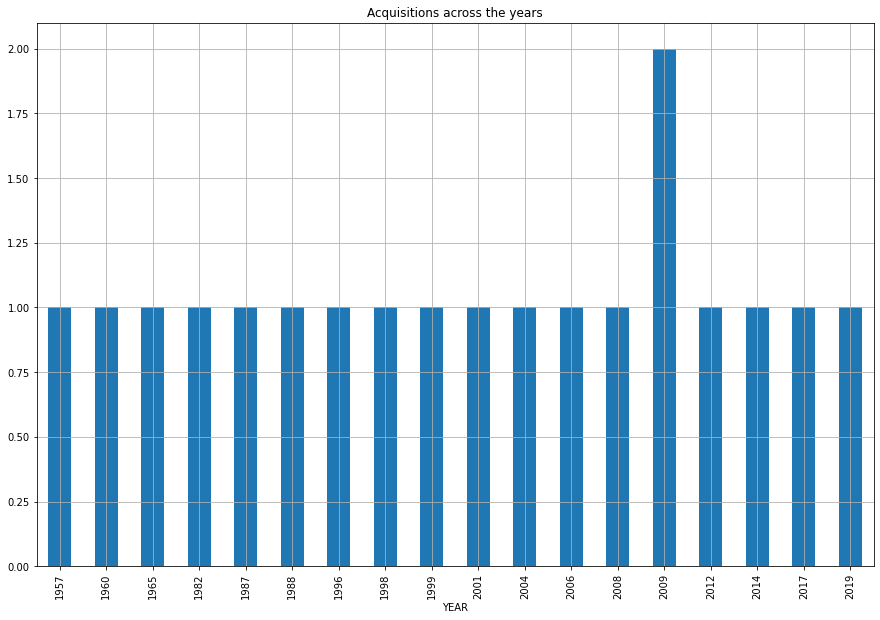

In [ ]:
plt.figure(figsize=(15,10))
data2['Acquisition Year'].value_counts(sort=False).plot.bar(grid=True)
plt.xlabel('YEAR')
plt.title("Acquisitions across the years")
plt.show()

**ACQUISITION PRICE TREND**

In [ ]:
data1['Acquisition Price'].describe()

count    3.900000e+01
mean     1.343853e+08
std      1.569588e+08
min      4.926000e+06
25%      2.000000e+07
50%      5.000000e+07
75%      2.000000e+08
max      6.000000e+08
Name: Acquisition Price, dtype: float64

In [ ]:
data2['Acquisition Price'].describe()

count    1.400000e+01
mean     8.137547e+09
std      1.885765e+10
min      5.625000e+05
25%      1.562500e+08
50%      2.175000e+09
75%      4.000000e+09
max      7.130000e+10
Name: Acquisition Price, dtype: float64

In [ ]:
maxindex1 = data1['Acquisition Price'].idxmax()
print(data1.iloc[maxindex1, :])

ID                                               104
Parent Company                                 Apple
Acquisition Year                                2018
Acquisition Month                                Oct
Acquired Company     Dialog Semiconductor (portions)
Business                            Chip development
Country                                       Others
Acquisition Price                        600000000.0
Category                                         NaN
Derived Products                                 NaN
Name: 103, dtype: object


In [ ]:
maxindex2 = data2['Acquisition Price'].idxmax()
print(data2.iloc[maxindex2, :])

IndexError: ignored

**BUSINESS CATEGORY INTERESTS FOR APPLE**

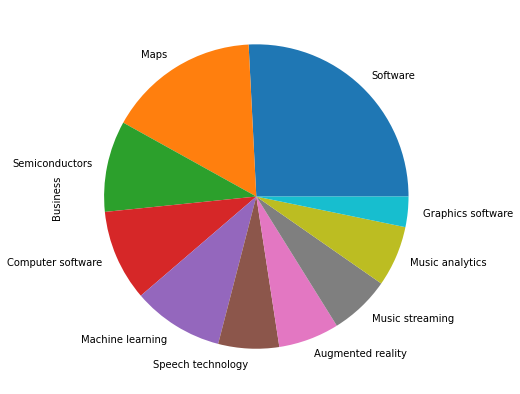

In [ ]:
categ_count = data1['Business'].value_counts()[:10].sort_values(ascending=False)
categ_count.plot(kind='pie', figsize=(30,7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


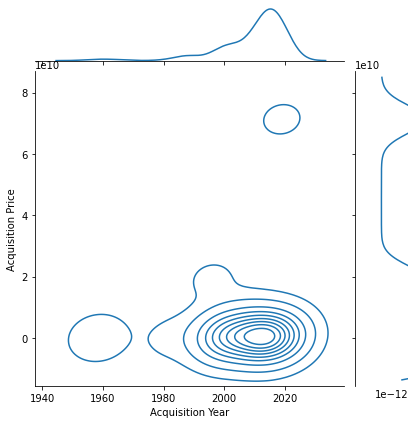

In [ ]:
data3['Acquisition Year'] = pd.to_numeric(data3['Acquisition Year'], errors = 'coerce')
sns.jointplot(x = "Acquisition Year", y="Acquisition Price", data=data3, kind = 'kde')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


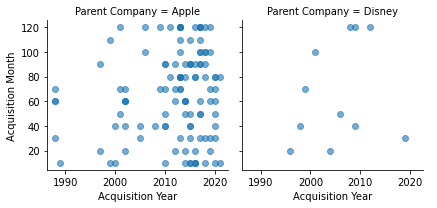

In [ ]:
data3['Acquisition Month'] =  data3['Acquisition Month'].replace({'Jan':10, 'Feb':20, 'Mar':30, 'Apr':40, 'May':50, 'Jun':60, 'Jul':70, 'Aug':80, 'Sep':90, 'Oct':100, 'Nov':110, 'Dec':120 })
sns.FacetGrid(data3, col = "Parent Company").map(plt.scatter, "Acquisition Year", "Acquisition Month", alpha =0.6).add_legend()

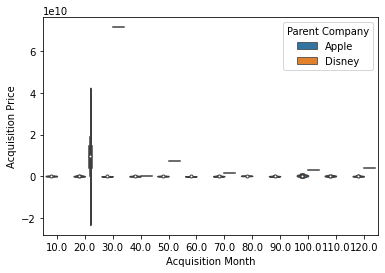

In [ ]:
ax = sns.violinplot(x="Acquisition Month", y="Acquisition Price", hue="Parent Company", data=data3)

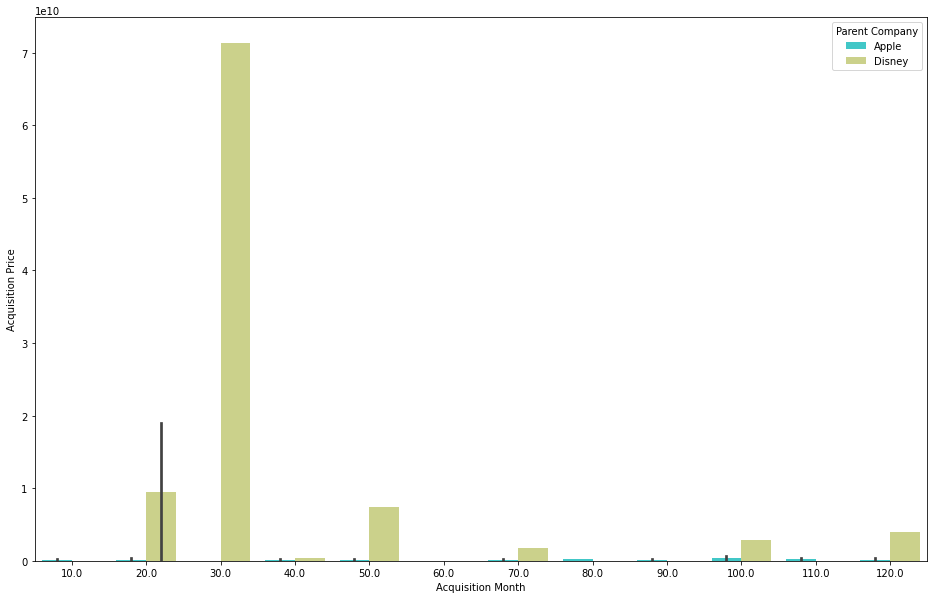

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x='Acquisition Month',y='Acquisition Price',data=data3, palette='rainbow', hue='Parent Company')

In [ ]:
data3['Business'] = data3['Business'].astype('str')
data3['Business'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('O')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


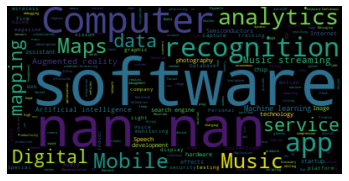

In [ ]:
from wordcloud import WordCloud
data2['Business'] = data2['Business'].astype('str') 
text = " ".join(business for business in data3.Business)

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
print(text)

Software Computer Software Computer software Computer software Computer software Unix-like hardware and software platform Macintosh clones Software Computer graphic chips Internet software Software Software Productivity software Internet service provider (ISP) Graphics software Online info systems services Special effects software FireWire chips and software Digital effects software internet and network optimization for wireless carriers Special-effects titling software for film and video Music production software Software Gesture recognition company Software Software Semiconductors Maps Music streaming Mobile advertising Semiconductors Voice control software Application Regionalization Firm Web-based mapping Facial recognition High-dynamic-range (HDR) photography 3D mapping Flash memory App search engine Audio PC and mobile security products HTML5 Web app firm Speech recognition Search engine Indoor location Maps Maps Semiconductors Media discovery app Maps Mobile data compression[cit